# **Mental Fitness Tracker**


## Importing the Libraries

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Evaluation 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

In [28]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Ignore Warnings

In [29]:
import warnings
warnings.filterwarnings("ignore")

## Importing the Data

In [30]:
data = pd.read_csv('Dataset\Mental_Fitness_data.csv')

In [31]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Analyzing the data

In [32]:
data.shape

(1259, 27)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [34]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


## Data cleaning

In [35]:

percentage = ((data.isnull().sum()/len(data))*100).sort_values(ascending=False)
percentage

comments                     86.973789
state                        40.905481
work_interfere               20.969023
self_employed                 1.429706
seek_help                     0.000000
obs_consequence               0.000000
mental_vs_physical            0.000000
phys_health_interview         0.000000
mental_health_interview       0.000000
supervisor                    0.000000
coworkers                     0.000000
phys_health_consequence       0.000000
mental_health_consequence     0.000000
leave                         0.000000
anonymity                     0.000000
Timestamp                     0.000000
wellness_program              0.000000
Age                           0.000000
benefits                      0.000000
tech_company                  0.000000
remote_work                   0.000000
no_employees                  0.000000
treatment                     0.000000
family_history                0.000000
Country                       0.000000
Gender                   

In [36]:
data = data.drop(['comments', 'state', 'Timestamp'], axis= 1)
data.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [37]:
default_values = {
    'int': 0,
    'string': 'NaN',
    'float': 0.0
}

feature_types = {
    'Age': 'int',
    'Gender': 'string',
    'Country': 'string',
    'self_employed': 'string',
    'family_history': 'string',
    'treatment': 'string',
    'work_interfere': 'string',
    'no_employees': 'string',
    'remote_work': 'string',
    'tech_company': 'string',
    'anonymity': 'string',
    'leave': 'string',
    'mental_health_consequence': 'string',
    'phys_health_consequence': 'string',
    'coworkers': 'string',
    'supervisor': 'string',
    'mental_health_interview': 'string',
    'phys_health_interview': 'string',
    'mental_vs_physical': 'string',
    'obs_consequence': 'string',
    'benefits': 'string',
    'care_options': 'string',
    'wellness_program': 'string',
    'seek_help': 'string'
}

for feature in data:
    data_type = feature_types.get(feature)
    default_value = default_values.get(data_type)

    if data_type and default_value is not None:
        data[feature] = data[feature].fillna(default_value)
    else:
        print(f'Error: Feature {feature} not recognized.')

data.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [38]:
gender = data['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [39]:
gender = data['Gender'].str.lower()

male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", 'ostensibly male, unsure what that really means']

for (row, col) in data.iterrows():

    if str.lower(col.Gender) in male:
        data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female:
        data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans:
        data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

unknown = ['A little about you', 'p']
data = data.query('Gender not in @unknown')

print(data['Gender'].unique())

['female' 'male' 'trans']


In [40]:
#Remove the na values and potential outliers
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.loc[data['Age'] < 18, 'Age'] = data['Age'].mean()
data.loc[data['Age'] > 120, 'Age'] = data['Age'].mean()
data['age_range'] = pd.cut(data['Age'], [0, 20, 30, 65, 100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [41]:
data['self_employed'].fillna('No', inplace=True)
data['self_employed'].replace('NaN', 'No', inplace=True)
print(data['self_employed'].unique())

['No' 'Yes']


In [42]:
data['work_interfere'] = data['work_interfere'].replace(['NaN'], "Don't know" )
print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


## Encoding the data


In [43]:
lDict = {}
for feature in data.columns:
    if data[feature].dtype == 'object':
        le = preprocessing.LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        lKey = 'label_' + feature
        lValue = list(le.classes_)
        lDict[lKey] = lValue

for key, value in lDict.items():
    print(key, value)

data = data.drop(['Country'], axis=1)
data.head()

label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_car

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37.0,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,31-65
1,44.0,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,31-65
2,32.0,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,31-65
3,31.0,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,31-65
4,31.0,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,31-65


In [44]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
age_range                      6  0.004773
Gender                         0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Age                            0  0.000000
wellness_program               0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
work_interfere                 0  0.000000
treatment                      0  0.000000
family_history                 0  0.000000
self_employ

In [45]:
data['age_range'].dropna()

0       31-65
1       31-65
2       31-65
3       31-65
4       31-65
        ...  
1254    21-30
1255    31-65
1256    31-65
1257    31-65
1258    21-30
Name: age_range, Length: 1251, dtype: category
Categories (4, object): ['0-20' < '21-30' < '31-65' < '66-100']

In [ ]:

percentage = ((data.isnull().sum()/len(data))*100).sort_values(ascending=False)
percentage

## Correlation Matrix

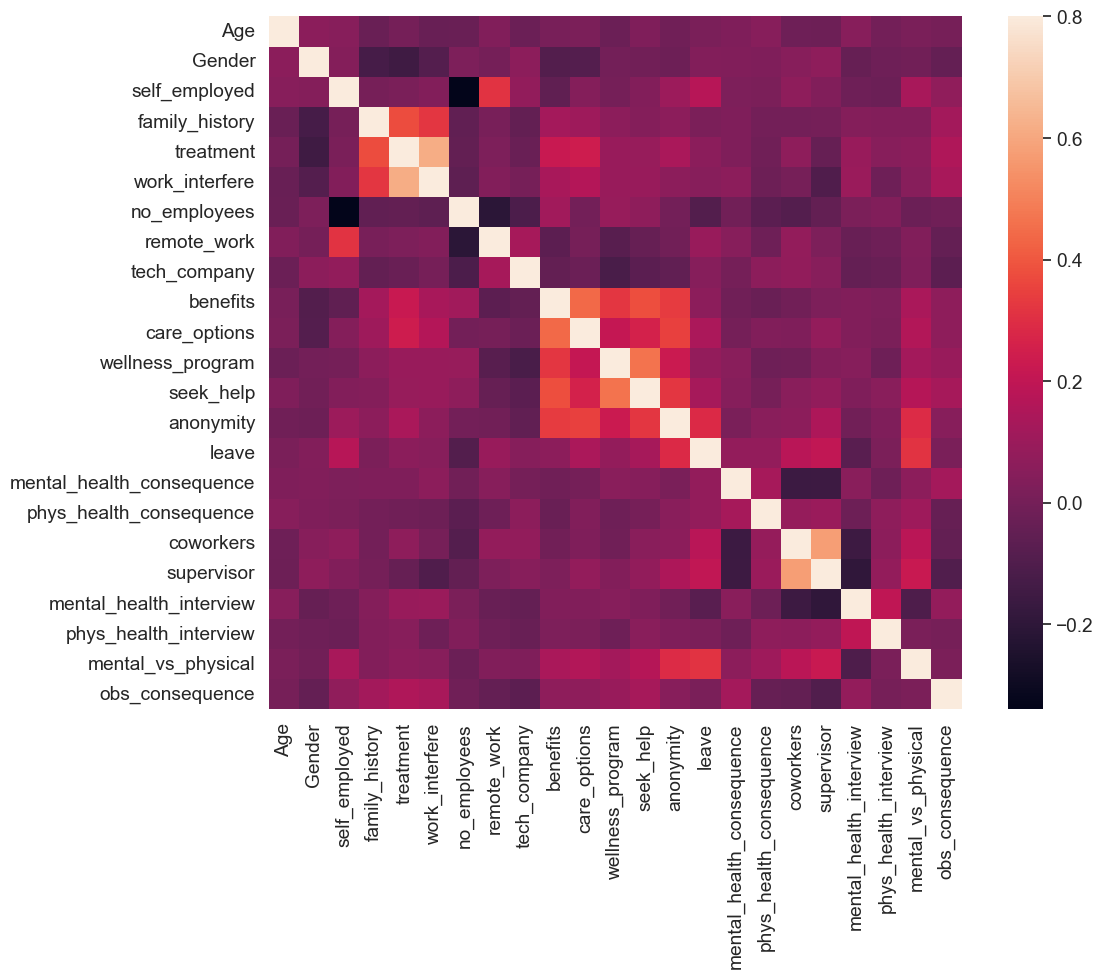

In [46]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

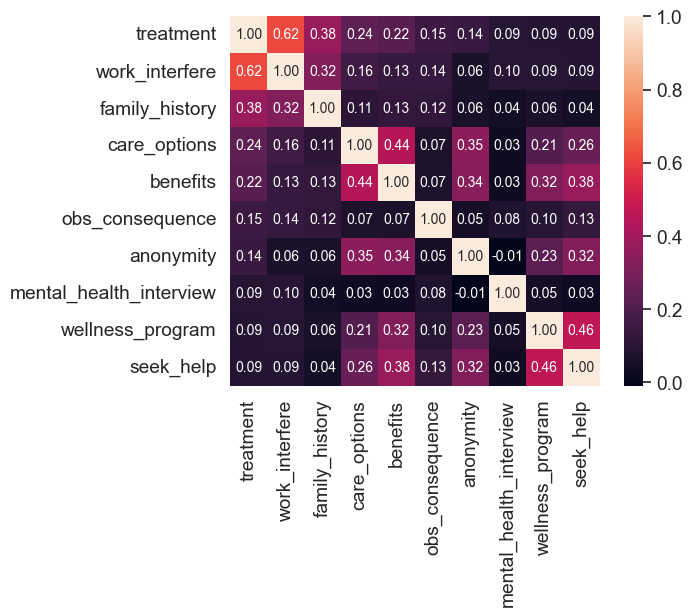

In [47]:
k = 10
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Charts to see relationship between the data

Text(0.5, 0, 'Age')

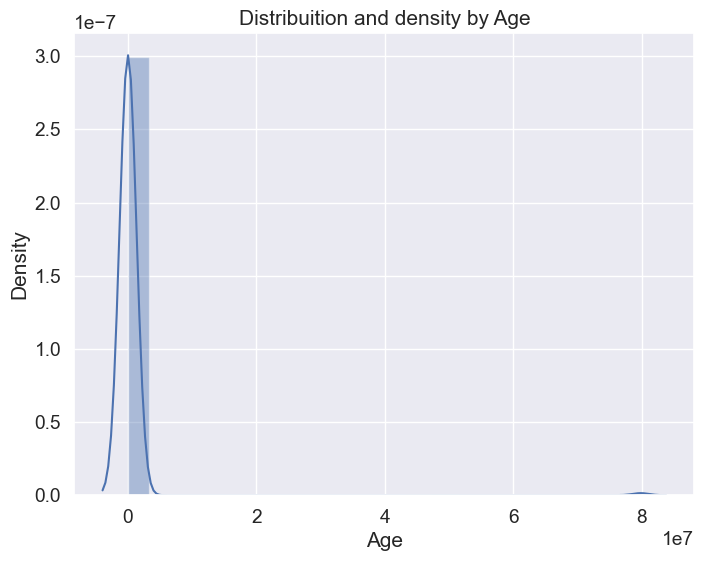

In [48]:
plt.figure(figsize=(8,6))
sns.distplot(data["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

Text(0.5, 1.0, 'Total Distribution by treated or not')

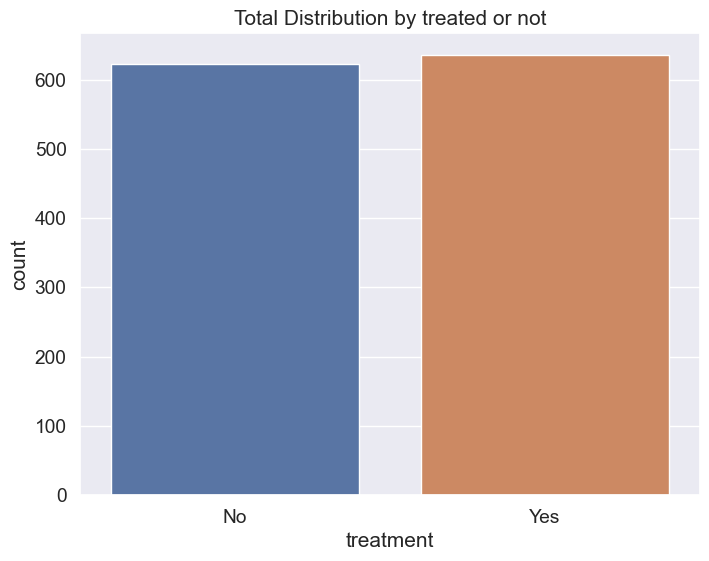

In [ ]:
plt.figure(figsize=(8, 6))
labels = lDict['label_treatment']
sns.countplot(x="treatment", data=data)
plt.xticks(ticks=[0, 1], labels=labels[:2])
plt.title('Total Distribution by treated or not')

<Figure size 1200x800 with 0 Axes>

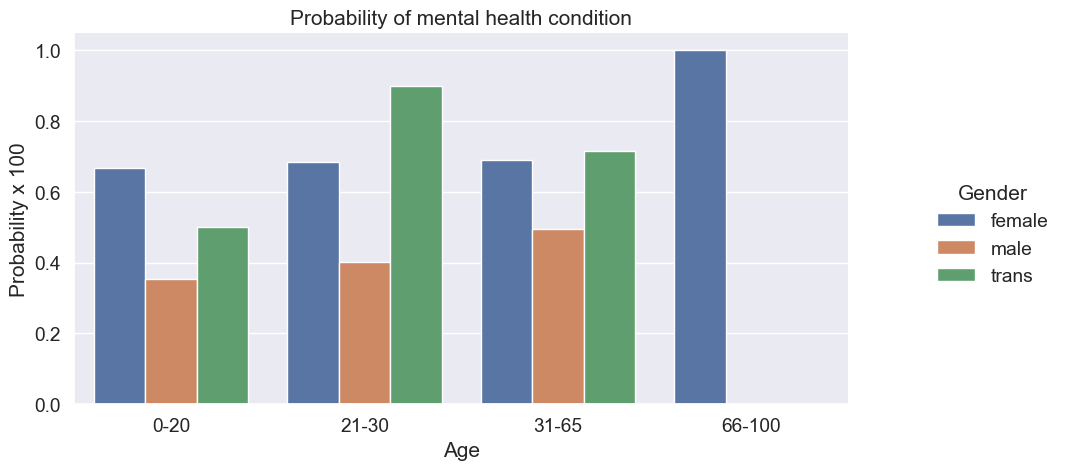

In [ ]:
plt.figure(figsize=(12, 8))
labels = ['0-20', '21-30', '31-65', '66-100']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=data, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(labels)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
new_labels = lDict['label_Gender']
g._legend.set_title('Gender')
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

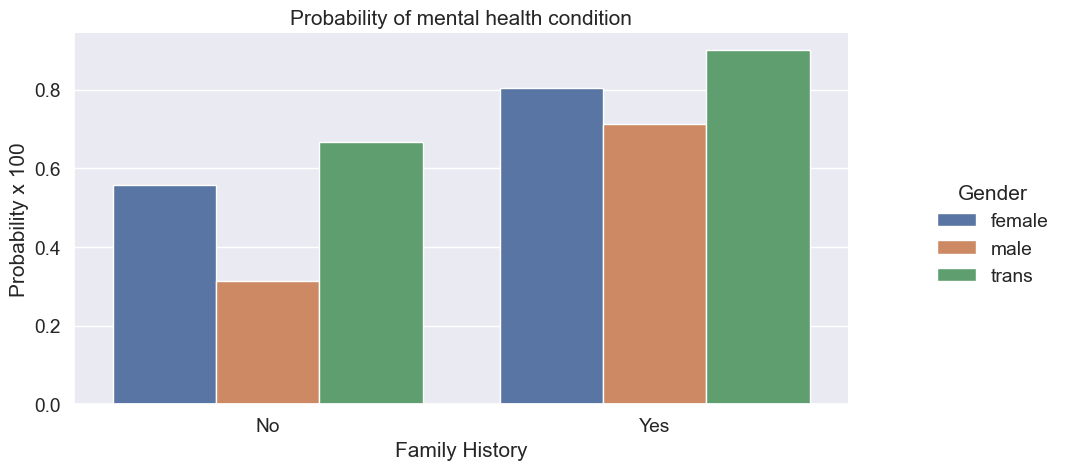

In [ ]:
family_history_labels = lDict['label_family_history']

g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=data, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(family_history_labels)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

gender_labels = lDict['label_Gender']
for t, l in zip(g._legend.texts, gender_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

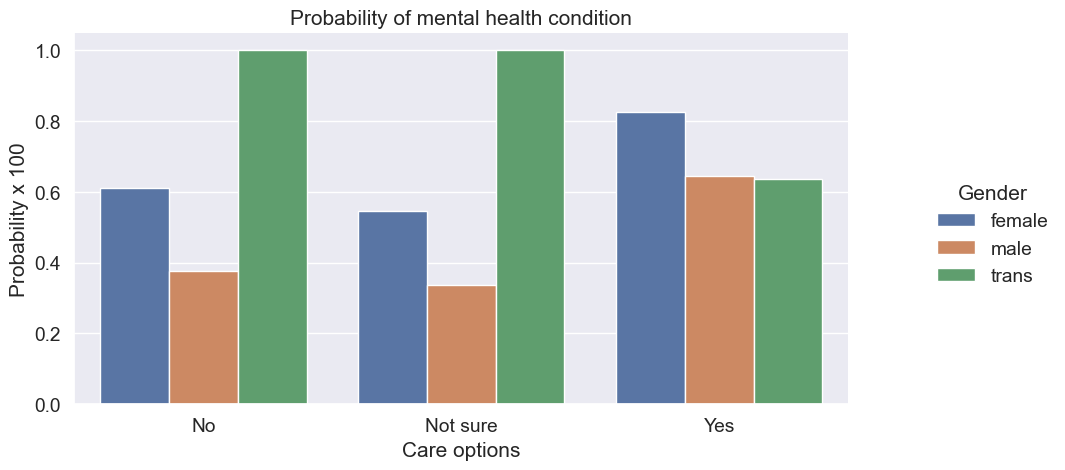

In [ ]:
o = lDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=data, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

new_labels = lDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

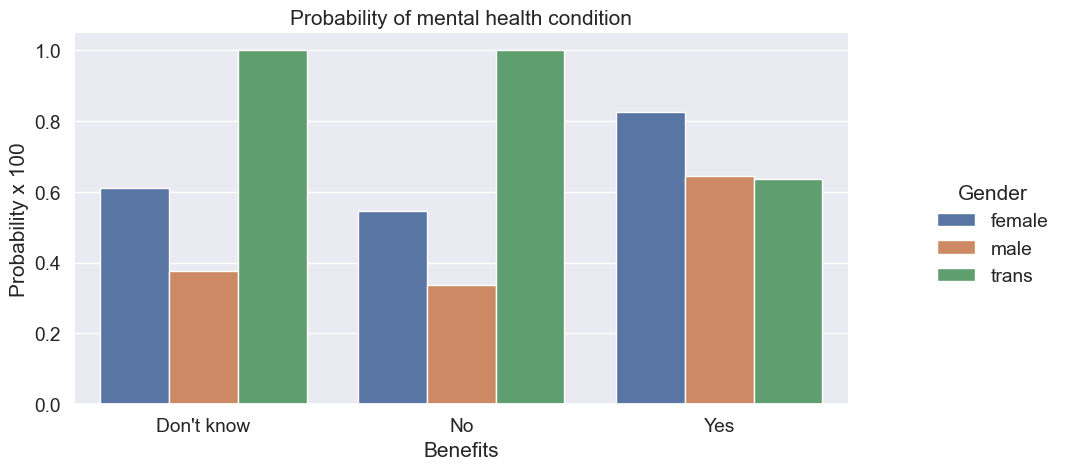

In [ ]:
o = lDict['label_benefits']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=data, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

new_labels = lDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

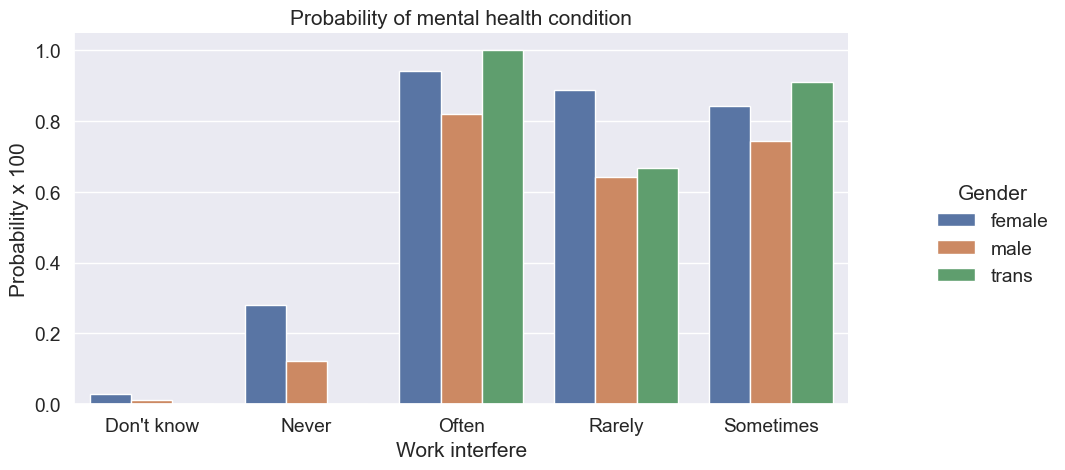

In [ ]:
o = lDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=data, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

new_labels = lDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

## Scaling and Fitting

In [ ]:
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.351852,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,31-65
1,0.481481,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,31-65
2,0.259259,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,31-65
3,0.240741,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,31-65
4,0.240741,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,31-65


In [ ]:
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = data[feature_cols]
y = data.treatment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

methodDict = {}
rmseDict = ()

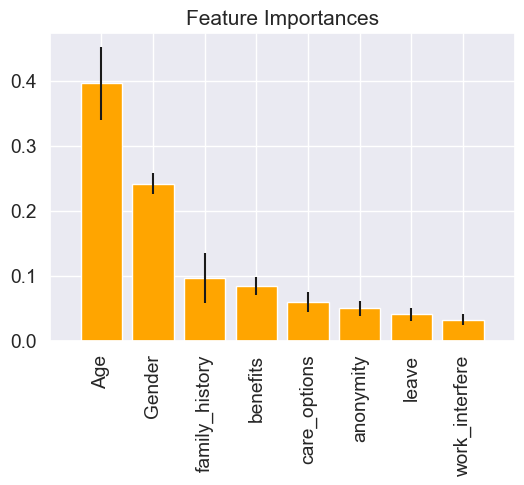

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

labels = [feature_cols[f] for f in range(X.shape[1])]

plt.figure(figsize=(6, 4))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="orange", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:

def evalClassModel(model, X_test, y_test, y_pred_prob=None, plot=False):
    y_pred_class = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Accuracy:', accuracy)

    print('Null accuracy:\n', y_test.value_counts())

    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:', 1 - y_test.mean())

    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    confusion = metrics.confusion_matrix(y_test, y_pred_class)

    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - accuracy)
    print('False Positive Rate:', confusion[0, 1] / float(confusion[0, 0] + confusion[0, 1]))
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    if y_pred_prob is not None:
        print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])
        print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    if plot and y_pred_prob is not None:
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        plt.show()

        roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    return accuracy


In [ ]:

def tuningCV(X, y):
    k_range = list(range(1, 31))
    k_scores = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())

    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

# Assuming 'X' represents the feature data and 'y' represents the target labels
# Replace 'X' and 'y' with your actual data if it's different
tuningCV(X, y)


In [ ]:
def tuningGridSearch(knn):
    k_range = list(range(1, 31))

    param_grid = dict(n_neighbors=k_range)

    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    grid.fit(X, y)

    grid.grid_scores_

    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)

    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [ ]:
def tuningRandomizedSearchCV(model, param_dist):
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    print('Rand. Best Score:', rand.best_score_)
    print('Rand. Best Params:', rand.best_params_)
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [ ]:
def tuningMultParam(knn):
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid)
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)
    print(grid.cv_results_)
    print('Multiparam. Best Score:', grid.best_score_)
    print('Multiparam. Best Params:', grid.best_params_)

## Models

Random Forest Accuracy: 0.8042328042328042



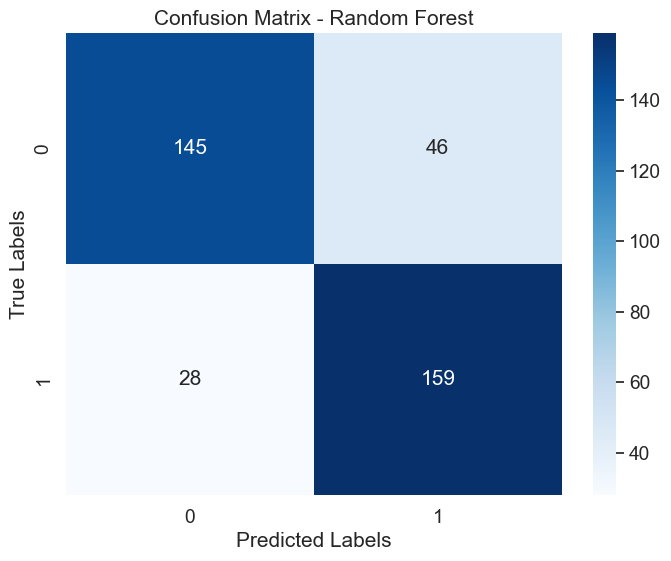

In [ ]:
def randomForest(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    y_pred_class = rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_class)

    cm = confusion_matrix(y_test, y_pred_class)

    return accuracy, cm

rf_accuracy, cm = randomForest(X_train, y_train, X_test, y_test)
methodDict['Random Forest'] = rf_accuracy * 100
print(f'Random Forest Accuracy: {rf_accuracy}')
print()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Decision Tree Accuracy: 0.7592592592592593



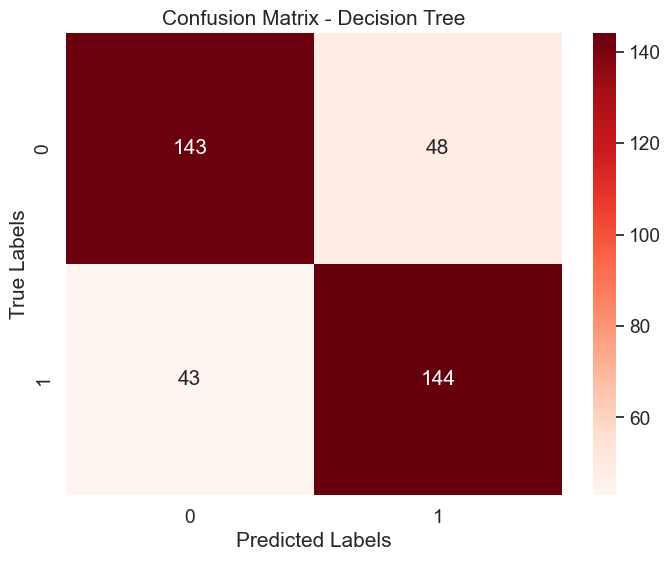

In [ ]:
def decisionTree(X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    y_pred_class = dt.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_class)

    cm = confusion_matrix(y_test, y_pred_class)

    return accuracy, cm

dt_accuracy, cm = decisionTree(X_train, y_train, X_test, y_test)
methodDict['Decision Tree'] = dt_accuracy * 100
print(f'Decision Tree Accuracy: {dt_accuracy}')
print()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Logistic Regression Accuracy: 0.7962962962962963



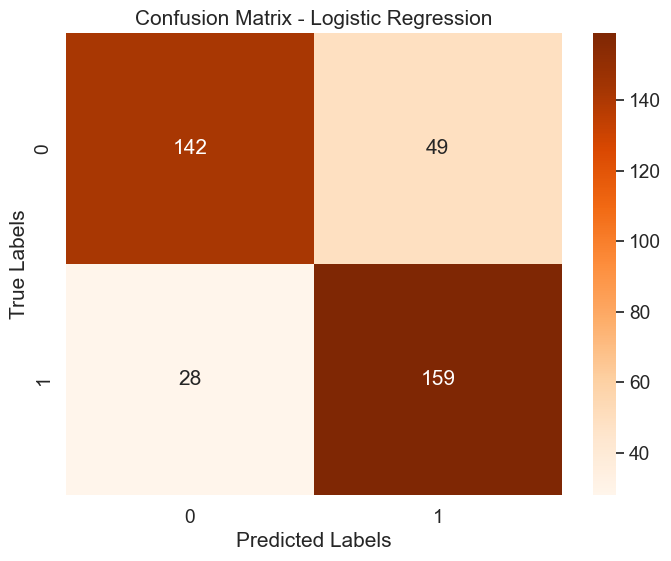

In [ ]:
def logisticRegression(X_train, y_train, X_test, y_test):
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    y_pred_class = logreg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_class)

    cm = confusion_matrix(y_test, y_pred_class)

    return accuracy, cm

accuracy, cm = logisticRegression(X_train, y_train, X_test, y_test)
methodDict['Log. Regres.'] = accuracy * 100
print(f'Logistic Regression Accuracy: {accuracy}')
print()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Support Vector Machines (SVM) Accuracy: 0.8068783068783069



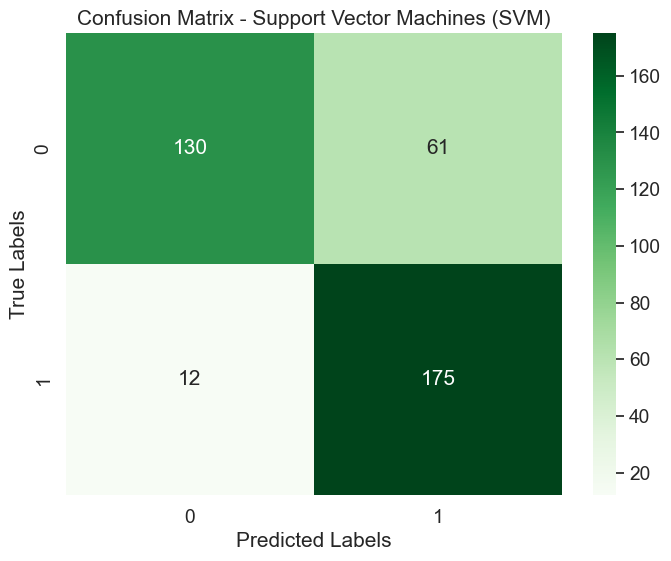

In [ ]:
def svm(X_train, y_train, X_test, y_test):
    svm_model = SVC()
    svm_model.fit(X_train, y_train)

    y_pred_class = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_class)

    cm = confusion_matrix(y_test, y_pred_class)

    return accuracy,cm

accuracy, cm = svm(X_train, y_train, X_test, y_test)
methodDict['SVM'] = accuracy * 100
print(f'Support Vector Machines (SVM) Accuracy: {accuracy}')
print()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Support Vector Machines (SVM)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Making Predictions

### Using Support Vector Machines (SVM)

In [ ]:
model_svm = SVC()

In [ ]:
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
accuracy = model_svm.score(X_test, y_test)
methodDict['SVM'] = accuracy * 100
print(f'Test set accuracy: {accuracy:.2f}')

Test set accuracy: 0.81


In [ ]:
predictions_svm = model_svm.predict(X_train)

results_svm = pd.DataFrame({'index': X_train.index, 'prediction': predictions_svm, 'expected': y_train})
results_svm.head()

,index,prediction,expected
929,929,0,0
901,901,1,1
579,579,1,1
367,367,1,1
615,615,1,1


### Using Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100)

In [ ]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
accuracy = model_rf.score(X_test, y_test)
methodDict['Random Forest'] = accuracy * 100
print(f'Test set accuracy: {accuracy:.2f}')

Test set accuracy: 0.82


In [ ]:
predictions_rf = model_rf.predict(X_train)

results_rf = pd.DataFrame({'index': X_train.index, 'prediction': predictions_rf, 'expected': y_train})
results_rf.head()

,index,prediction,expected
929,929,0,0
901,901,1,1
579,579,1,1
367,367,1,1
615,615,1,1


## Creating a submission file

For the model using SVM  

In [ ]:
clf = SVC()

clf.fit(X_train, y_train)

dfTestPredictions = clf.predict(X_test)

results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
#results.to_csv('results_svm.csv', index=False)
results.head()

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,1


For the model using Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

dfTestPredictions = clf.predict(X_test)

results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
#results.to_csv('results_rf.csv', index=False)
results.head()

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0
